# **Import Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# **Read Dataset**

In [3]:
data =pd.read_csv('/content/Country-data.csv')

# **Explore Data**

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data.shape

(167, 10)

# **Clustering By KMeans**

In [9]:
df = data.drop('country', axis=1)

In [10]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [12]:
Scal_df = StandardScaler().fit_transform(df)

In [13]:
Scal_df

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [14]:
inertia = []
k = range(1,10)

for i in k:
  km = KMeans(n_clusters=i, random_state=42)
  km.fit_transform(Scal_df)
  inertia.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

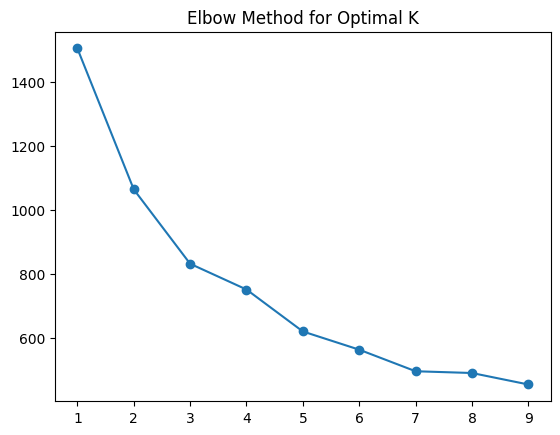

In [16]:
plt.plot(k,inertia,"o-")
plt.title('Elbow Method for Optimal K')

In [19]:
km = KMeans(n_clusters=7,random_state=42)
km.fit_transform(Scal_df)
km.inertia_

496.2696004780955

In [20]:
labels = km.labels_
data['target'] = labels

In [21]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,6
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,6


In [22]:
data[data['country']=='Egypt']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
47,Egypt,29.1,21.3,4.66,26.6,9860,10.1,70.5,3.19,2600,0


In [23]:
data['country'][data['target']==0]

,country
2,Algeria
5,Argentina
6,Armenia
9,Azerbaijan
12,Bangladesh
19,Bolivia
21,Botswana
22,Brazil
33,Chile
34,China


# **Clustering By Agglomerative Hierarchical**

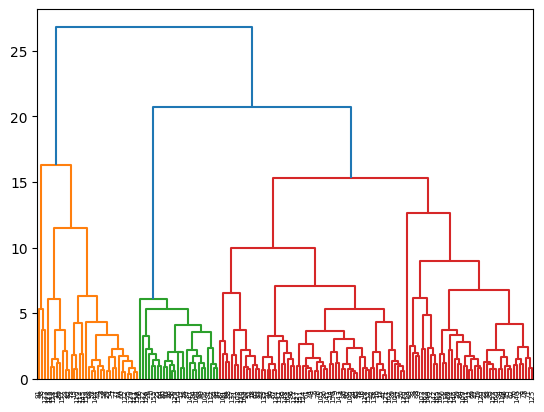

In [25]:
dendrogram = hcluster.dendrogram(hcluster.linkage(Scal_df,method='ward'))

In [26]:
hcl = AgglomerativeClustering(n_clusters=4,linkage='ward')

In [27]:
hcl.fit_predict(Scal_df)

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 3, 0, 2, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2])

In [28]:
data['target'] = hcl.labels_

In [30]:
data.head(100)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.27,74.5,2.15,9070,0
96,Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,3


# **Clustering Model By DBScan**

In [32]:
db = DBSCAN(eps = 1 ,min_samples=5)

In [33]:
db.fit(Scal_df)

DBSCAN(eps=1)

In [34]:
data['target'] = db.labels_

In [35]:
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,-1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,-1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,-1


# **Dimension Reduction Model By PCA**

In [40]:
Scal_df.shape

(167, 9)

In [41]:
paca = PCA(n_components=6)

In [42]:
data_paca = paca.fit_transform(Scal_df)

In [45]:
data_paca.shape

(167, 6)